In [33]:
#from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

houses_prices_data = pd.read_csv("houses_prices.csv")

houses_prices_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [39]:
houses_characteristics = houses_prices_data.columns
houses_characteristics

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
# Porcentaje de filas faltantes por caracteristica(columna)
(houses_prices_data.isna().mean() * 100).sort_values(ascending=False)

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
MasVnrType       60.500171
                   ...    
EnclosedPorch     0.000000
MoSold            0.000000
MiscVal           0.000000
YrSold            0.000000
SaleCondition     0.000000
Length: 81, dtype: float64

In [64]:
# Porcentaje de caracteristicas(columnas) faltantes por fila
((houses_prices_data.isna().sum(axis=1) / houses_prices_data.shape[1]) * 100).sort_values(ascending=False)

1847    22.222222
2193    20.987654
2120    20.987654
2189    20.987654
2891    20.987654
          ...    
766      2.469136
1083     2.469136
810      2.469136
1328     2.469136
1386     1.234568
Length: 2919, dtype: float64

In [33]:
# Caracteristicas(columnas) con entre 0 y 1% de filas faltantes, quiza sean filas a eliminar o rellenar
houses_miss_values = (houses_prices_data.isna().mean() * 100).sort_values(ascending=False)
values_below_1percent = houses_miss_values[houses_miss_values.between(0,1, inclusive="neither")]
values_below_1percent

MasVnrArea      0.787941
MSZoning        0.137033
Functional      0.068517
BsmtFullBath    0.068517
Utilities       0.068517
BsmtHalfBath    0.068517
SaleType        0.034258
BsmtFinSF2      0.034258
BsmtFinSF1      0.034258
TotalBsmtSF     0.034258
BsmtUnfSF       0.034258
Exterior2nd     0.034258
KitchenQual     0.034258
GarageCars      0.034258
GarageArea      0.034258
Electrical      0.034258
Exterior1st     0.034258
dtype: float64

In [44]:
# Casas donde la caracteristica MasVnrArea() es nula
houses_prices_data.loc[houses_prices_data['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
1691,1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
1706,1707,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,NaN


In [36]:
# Caracteristicas(columnas) con entre 50 y 100% de filas faltantes, quiza sean columnas a descartar, o rellenar
houses_miss_values = (houses_prices_data.isna().mean() * 100).sort_values(ascending=False)
values_above_50percent = houses_miss_values[houses_miss_values.between(50,100, inclusive="both")]
values_above_50percent

PoolQC         99.657417
MiscFeature    96.402878
Alley          93.216855
Fence          80.438506
MasVnrType     60.500171
dtype: float64

In [43]:
# Casas donde la caracteristica PoolQC(Pool Water Quality) no es nula
houses_prices_data.loc[houses_prices_data['PoolQC'].notna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000.0
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000.0
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000.0
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000.0
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000.0
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970.0
1974,1975,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,NaN
2573,2574,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,...,228,Ex,NaN,NaN,0,8,2007,WD,Normal,NaN
2710,2711,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,...,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal,NaN


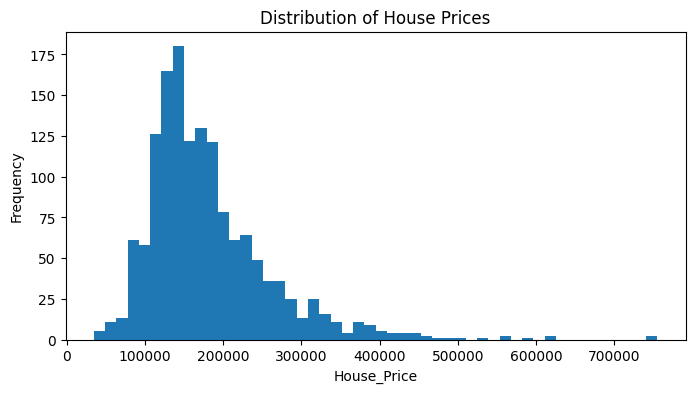

In [7]:
# Histograma de Precios de casas
plt.figure(figsize=(8, 4))
plt.hist(houses_prices_data["SalePrice"], bins=50)
plt.title("Distribution of House Prices")
plt.xlabel("House_Price")
plt.ylabel("Frequency")
plt.show()

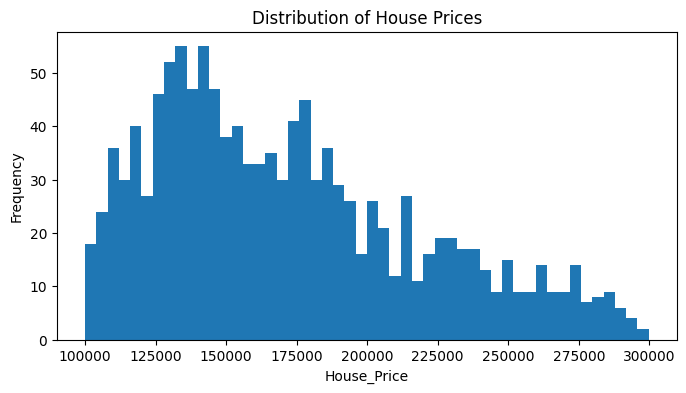

In [8]:
# Histograma de Precios de casas entre 100000$ y 300000$
houses_prices_medium = houses_prices_data.loc[houses_prices_data["SalePrice"].between(100000,300000)]
plt.figure(figsize=(8, 4))
plt.hist(houses_prices_medium["SalePrice"], bins=50)
plt.title("Distribution of House Prices")
plt.xlabel("House_Price")
plt.ylabel("Frequency")
plt.show()

<Axes: >

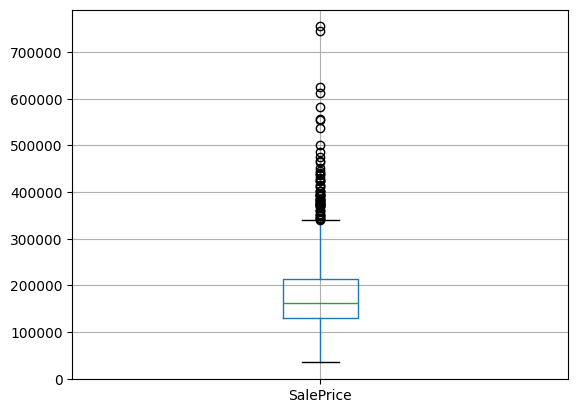

In [26]:
# BoxPlot
houses_prices_data.boxplot(column=["SalePrice"])

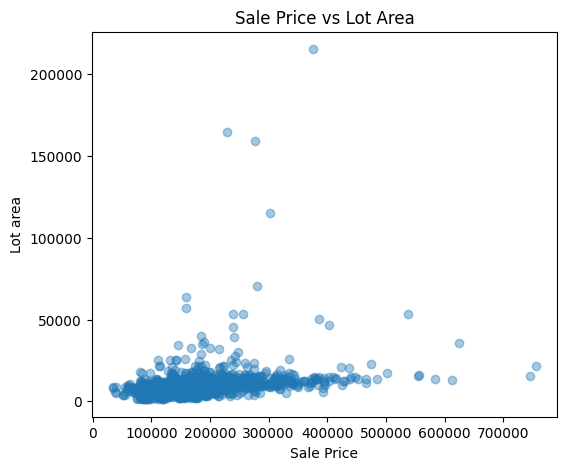

In [35]:
# ScatterPlot Sale price vs Lot Area, deberiamos remover los outlier para que se vea mejor
plt.figure(figsize=(6, 5))
plt.scatter(houses_prices_data["SalePrice"], houses_prices_data["LotArea"], alpha=0.4)
plt.yscale("linear")
plt.title("Sale Price vs Lot Area")
plt.xlabel("Sale Price")
plt.ylabel("Lot area")
plt.show()

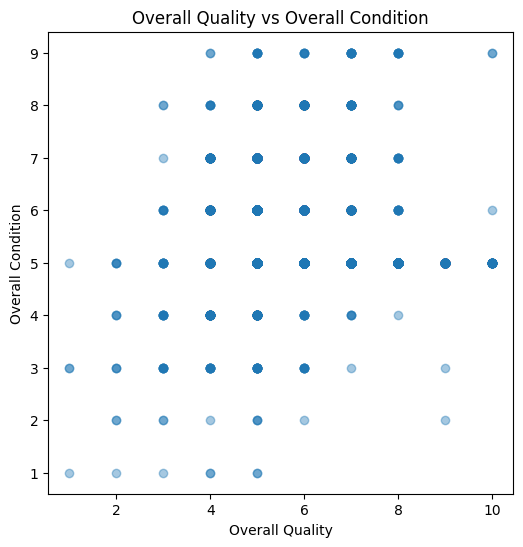

In [36]:
# ScatterPlot de Overall Quality vs Overall Condition
plt.figure(figsize=(6, 6))
plt.scatter(houses_prices_data["OverallQual"], houses_prices_data["OverallCond"], alpha=0.4)
plt.yscale("linear")
plt.title("Overall Quality vs Overall Condition")
plt.xlabel("Overall Quality")
plt.ylabel("Overall Condition")
plt.show()

In [37]:
# Outliers(Valores atípicos) de los precios de venta de las casas calculados usando Interquartile Range (IQR) Method
Q1 = houses_prices_data['SalePrice'].quantile(0.25)
Q3 = houses_prices_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = houses_prices_data[(houses_prices_data['SalePrice'] < lower_bound) | (houses_prices_data['SalePrice'] > upper_bound)]
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000.0
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000.0
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780.0
112,113,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,383970.0
151,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,New,Partial,372402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000.0
1353,1354,50,RL,56.0,14720,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,410000.0
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500.0
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500.0


In [41]:
# Outliers(Valores atípicos) del area del lote de la casa(LotArea) calculados usando Interquartile Range (IQR) Method
Q1 = houses_prices_data['LotArea'].quantile(0.25)
Q3 = houses_prices_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = houses_prices_data[(houses_prices_data['LotArea'] < lower_bound) | (houses_prices_data['LotArea'] > upper_bound)]
outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000.0
66,67,20,RL,NaN,19900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2010,WD,Normal,180000.0
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000.0
120,121,80,RL,NaN,21453,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,180000.0
159,160,60,RL,134.0,19378,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2006,New,Partial,320000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2880,2881,50,RL,66.0,21780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,9,2006,WD,Normal,NaN
2896,2897,20,RL,69.0,23580,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,NaN
2900,2901,20,RL,NaN,50102,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Alloca,NaN
2904,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN


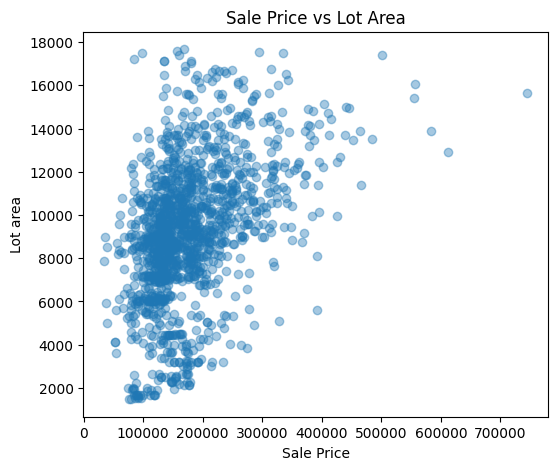

In [44]:
# ScatterPLot Sale price vs Lot Area, removiendo Outliers(Valores atípicos) del area del lote de la casa(LotArea) usando IQR
Q1 = houses_prices_data['LotArea'].quantile(0.25)
Q3 = houses_prices_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

houses_prices_NoLotAreaOutliers = houses_prices_data[(houses_prices_data['LotArea'] >= lower_bound) & (houses_prices_data['LotArea'] <= upper_bound)]

plt.figure(figsize=(6, 5))
plt.scatter(houses_prices_NoLotAreaOutliers["SalePrice"], houses_prices_NoLotAreaOutliers["LotArea"], alpha=0.4)
plt.yscale("linear")
plt.title("Sale Price vs Lot Area")
plt.xlabel("Sale Price")
plt.ylabel("Lot area")
plt.show()



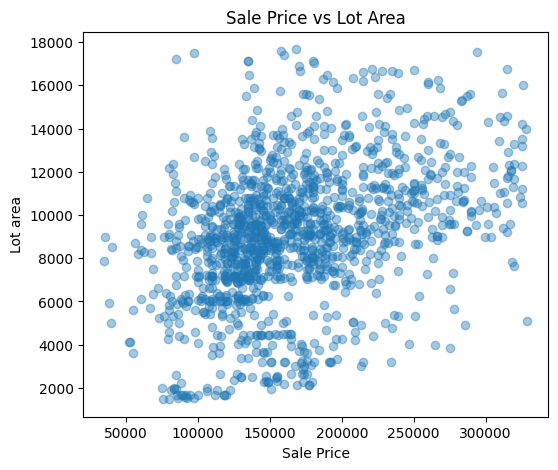

In [47]:
# ScatterPLot Sale price vs Lot Area, removiendo Outliers(Valores atípicos) del area del lote de la casa(LotArea) y el precio de venta usando IQR
# En conclusión no parece haber correlacion notable
Q1 = houses_prices_data['LotArea'].quantile(0.25)
Q3 = houses_prices_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

houses_prices_NoLotAreaOutliers = houses_prices_data[(houses_prices_data['LotArea'] >= lower_bound) & (houses_prices_data['LotArea'] <= upper_bound)]

Q1 = houses_prices_NoLotAreaOutliers['SalePrice'].quantile(0.25)
Q3 = houses_prices_NoLotAreaOutliers['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

houses_prices_clean = houses_prices_NoLotAreaOutliers[(houses_prices_NoLotAreaOutliers['SalePrice'] >= lower_bound) & (houses_prices_NoLotAreaOutliers['SalePrice'] <= upper_bound)]

plt.figure(figsize=(6, 5))
plt.scatter(houses_prices_clean["SalePrice"], houses_prices_clean["LotArea"], alpha=0.4)
plt.yscale("linear")
plt.title("Sale Price vs Lot Area")
plt.xlabel("Sale Price")
plt.ylabel("Lot area")
plt.show()